<div style ="color:#104176;background-color:#FBD8AF;padding:3%;border-radius:150px 150px;font-size:2em;text-align:center">Data Analysis with-LR-Dt-RF-and-SVM</div>


<div style ="color:#734F96;font-size:2em;padding:3%">Objective :- Vaccination Status Prediction Model</div>

### 1.) Importing Dataset ans Libraries

In [1]:
import pandas as pd              
import numpy as np               
import matplotlib.pyplot as plt  
import seaborn as sns 
%matplotlib inline

In [2]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression      
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter 

In [3]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [4]:
plt.style.use("dark_background")

In [5]:
df = pd.read_csv("h1n1_vaccine_prediction.csv")

### 2.) Exploratary Data Analysis

In [6]:
df.shape

(26707, 34)

In [7]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [8]:
df.describe(include = 'all')

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26707,25300,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6843,10097,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [9]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [11]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [12]:
df['age_bracket'].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [13]:
df['qualification'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [14]:
df['qualification'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [15]:
df['race'].unique()

array(['White', 'Black', 'Other or Multiple', 'Hispanic'], dtype=object)

In [16]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
df['income_level'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

In [18]:
df['marital_status'].unique()

array(['Not Married', 'Married', nan], dtype=object)

In [19]:
df['housing_status'].unique()

array(['Own', 'Rent', nan], dtype=object)

In [20]:
df['employment'].unique()

array(['Not in Labor Force', 'Employed', 'Unemployed', nan], dtype=object)

In [21]:
df['employment'].unique()

array(['Not in Labor Force', 'Employed', 'Unemployed', nan], dtype=object)

In [22]:
df['census_msa'].unique()

array(['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'],
      dtype=object)

### 4.) Data Visualisation

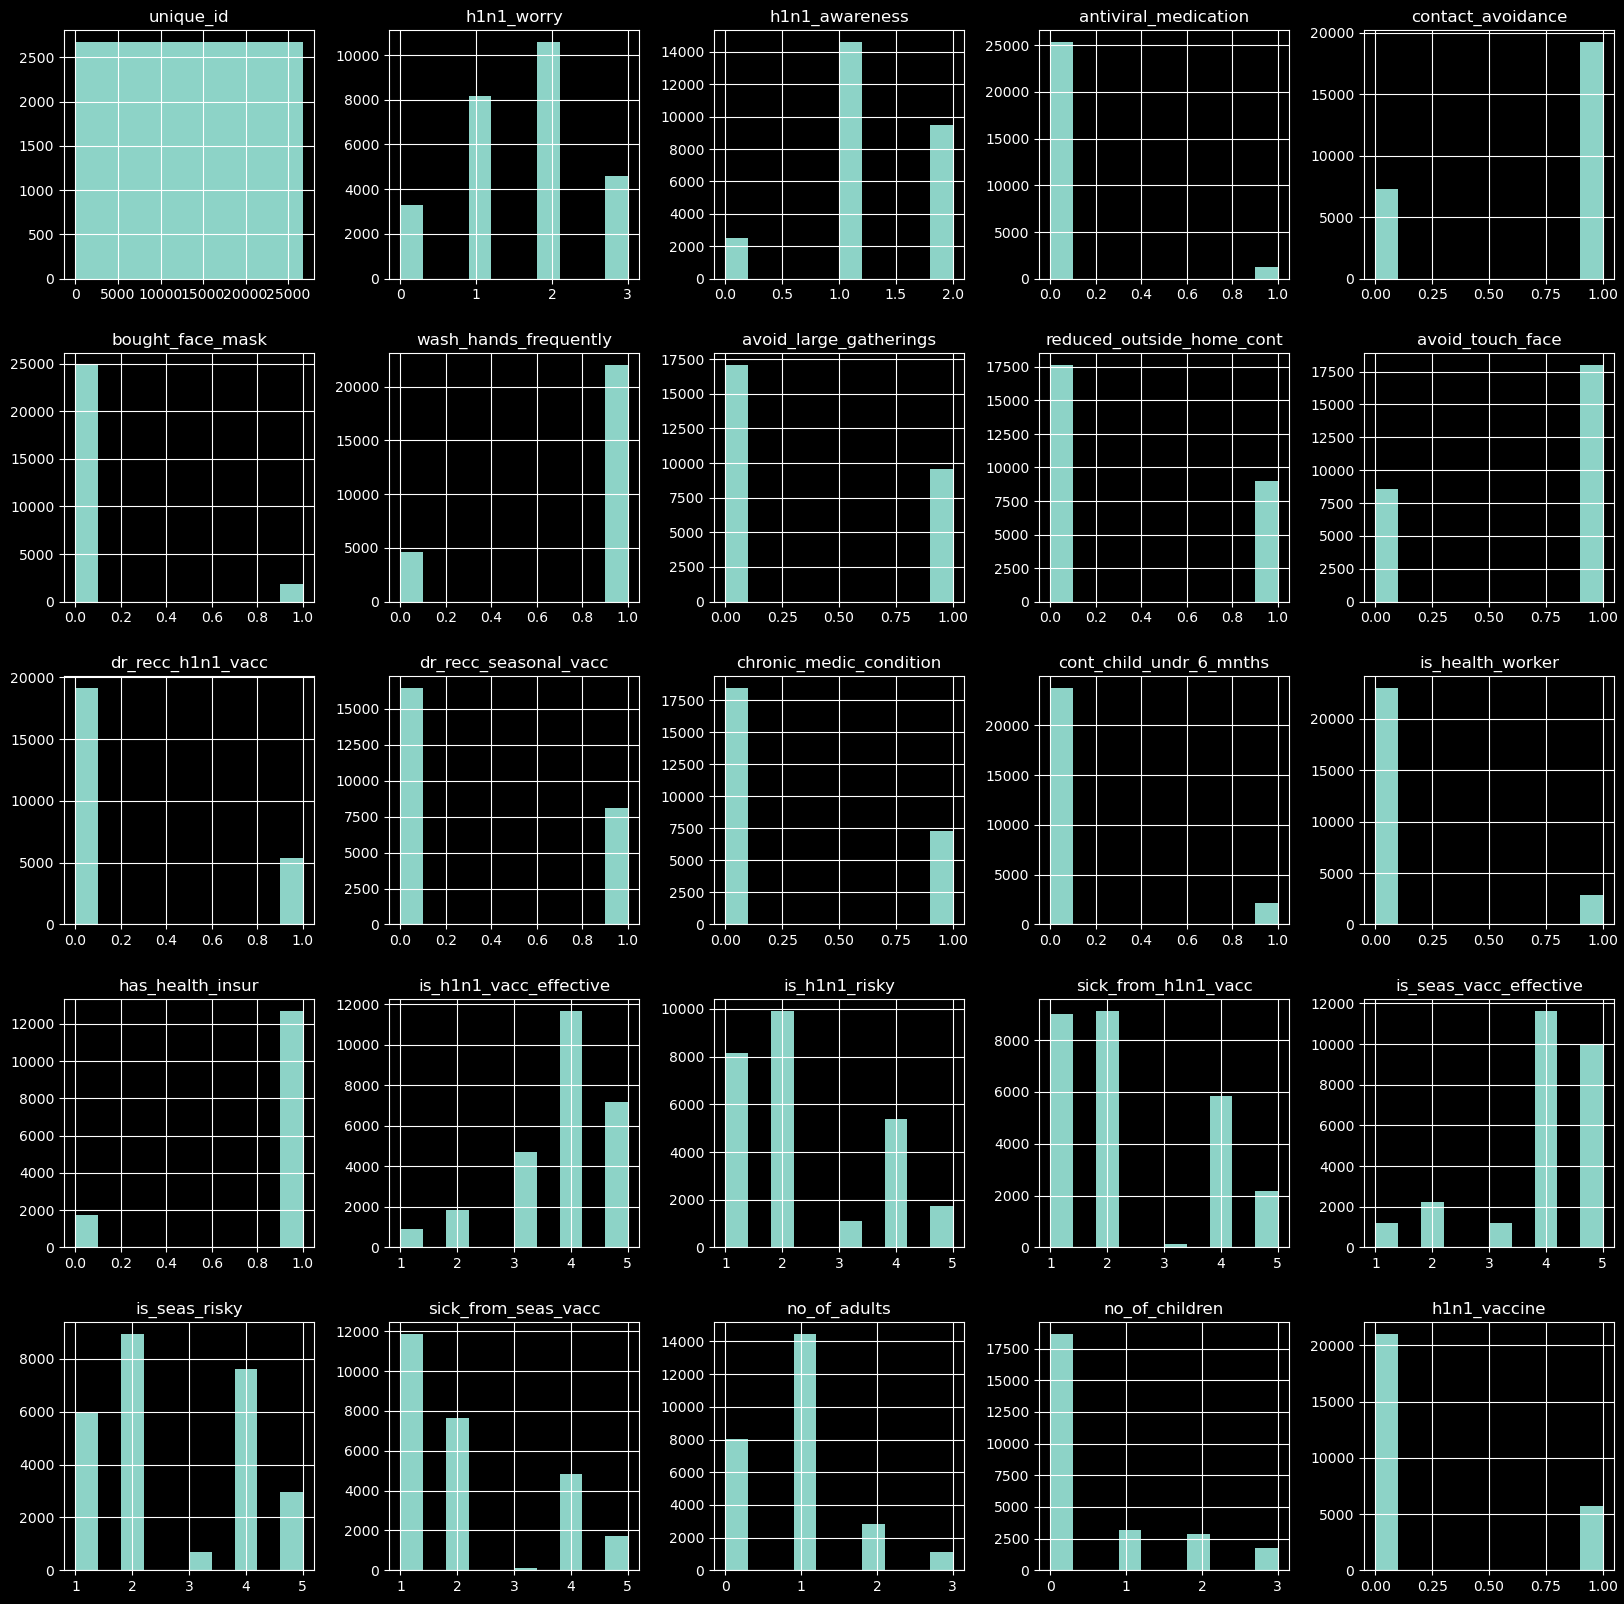

In [23]:
df.hist(figsize = (20,20)) # to get histogram for all numerical attribute together
plt.show()

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

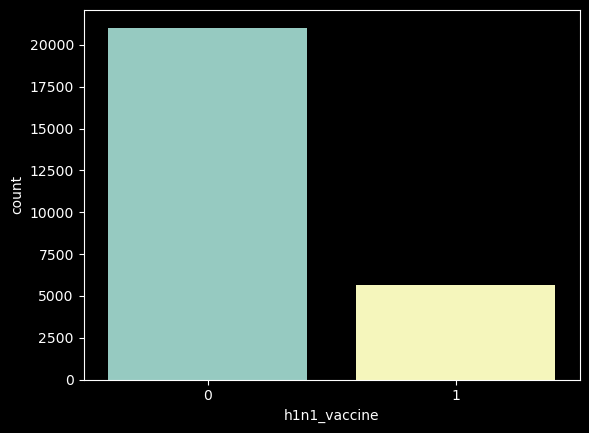

In [24]:
sns.countplot(x = "h1n1_vaccine", data = df)

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

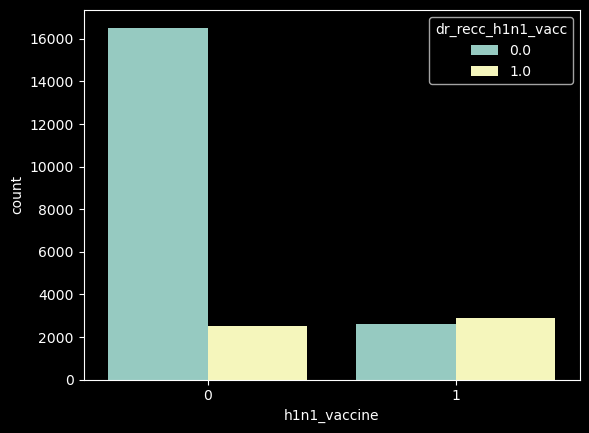

In [25]:
sns.countplot(x="h1n1_vaccine",hue="dr_recc_h1n1_vacc",data=df)

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

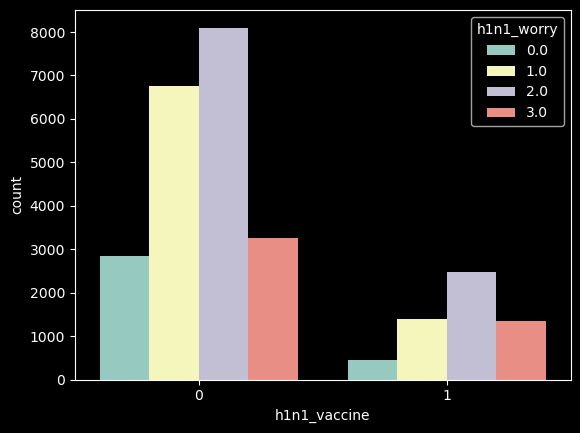

In [26]:
sns.countplot(x="h1n1_vaccine",hue="h1n1_worry",data=df)

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

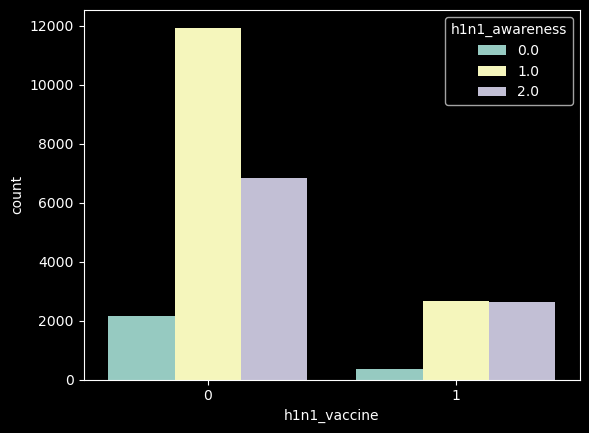

In [27]:
sns.countplot(x="h1n1_vaccine",hue="h1n1_awareness",data=df)

### 3.) Treating Missing Values 

In [28]:
import missingno as msno
import matplotlib.pyplot as plt

<Axes: >

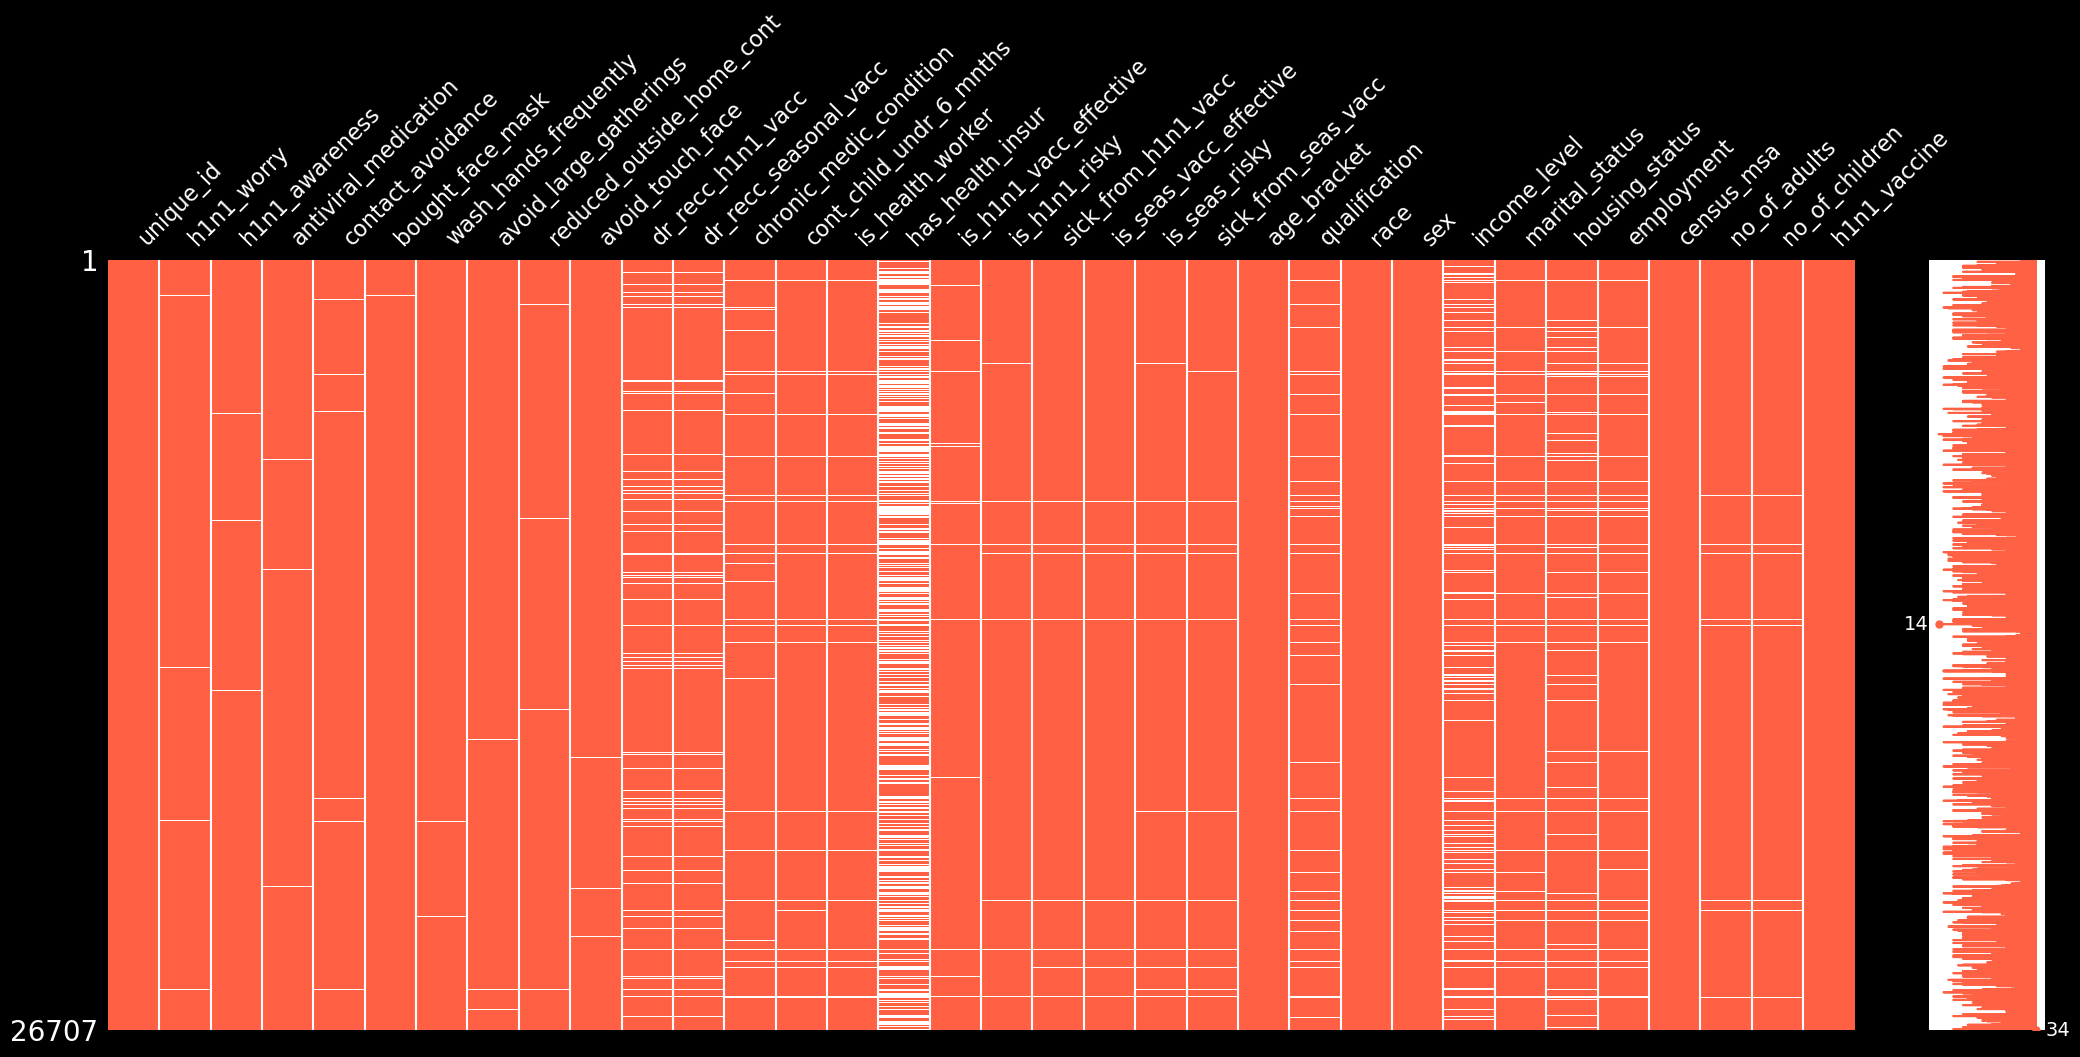

In [29]:
msno.matrix(df,color = (1,0.38,0.27))

In [30]:
df['employment']=np.where(df['employment'] =='Not in Labor Force', 'Employed', df['employment'])

In [31]:
df['qualification']=np.where(df['qualification'] =='< 12 Years', 'Metric', df['qualification'])
df['qualification']=np.where(df['qualification'] =='12 Years', 'High School Graduate', df['qualification'])
df['qualification']=np.where(df['qualification'] =='Some College', 'College Graduate', df['qualification'])

In [32]:
df = df.drop(['has_health_insur'],axis = 1)

In [33]:
df = df.drop(['unique_id'],axis = 1)

In [34]:
df['income_level'].fillna(df['income_level'].mode()[0],inplace = True)
df['qualification'].fillna(df['qualification'].mode()[0],inplace = True)
df['marital_status'].fillna(df['marital_status'].mode()[0],inplace = True)
df['employment'].fillna(df['employment'].mode()[0],inplace = True)
df['housing_status'].fillna(df['housing_status'].mode()[0],inplace = True)

In [35]:
df['h1n1_worry'].fillna(df['h1n1_worry'].median(),inplace = True)
df['h1n1_awareness'].fillna(df['h1n1_awareness'].median(),inplace = True)
df['antiviral_medication'].fillna(df['antiviral_medication'].median(),inplace = True)
df['contact_avoidance'].fillna(df['contact_avoidance'].median(),inplace = True)
df['bought_face_mask'].fillna(df['bought_face_mask'].median(),inplace = True)
df['wash_hands_frequently'].fillna(df['wash_hands_frequently'].median(),inplace = True)
df['avoid_large_gatherings'].fillna(df['avoid_large_gatherings'].median(),inplace = True)
df['wash_hands_frequently'].fillna(df['wash_hands_frequently'].median(),inplace = True)
df['reduced_outside_home_cont'].fillna(df['reduced_outside_home_cont'].median(),inplace = True)
df['avoid_touch_face'].fillna(df['avoid_touch_face'].median(),inplace = True)
df['reduced_outside_home_cont'].fillna(df['reduced_outside_home_cont'].median(),inplace = True)
df['avoid_touch_face'].fillna(df['avoid_touch_face'].median(),inplace = True)
df['dr_recc_h1n1_vacc'].fillna(df['dr_recc_h1n1_vacc'].median(),inplace = True)
df['dr_recc_seasonal_vacc'].fillna(df['dr_recc_seasonal_vacc'].median(),inplace = True)
df['chronic_medic_condition'].fillna(df['chronic_medic_condition'].median(),inplace = True)
df['cont_child_undr_6_mnths'].fillna(df['cont_child_undr_6_mnths'].median(),inplace = True)
df['is_health_worker'].fillna(df['is_health_worker'].median(),inplace = True)
df['is_h1n1_vacc_effective'].fillna(df['is_h1n1_vacc_effective'].median(),inplace = True)
df['is_h1n1_risky'].fillna(df['is_h1n1_risky'].median(),inplace = True)
df['sick_from_h1n1_vacc'].fillna(df['sick_from_h1n1_vacc'].median(),inplace = True)
df['is_seas_vacc_effective'].fillna(df['is_seas_vacc_effective'].median(),inplace = True)
df['is_seas_risky'].fillna(df['is_seas_risky'].median(),inplace = True)
df['no_of_adults'].fillna(df['no_of_adults'].median(),inplace = True)
df['no_of_children'].fillna(df['no_of_children'].median(),inplace = True)
df['sick_from_seas_vacc'].fillna(df['sick_from_seas_vacc'].median(),inplace = True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
df['age_bracket']=le.fit_transform(df['age_bracket'])
df['qualification']=le.fit_transform(df['qualification'])
df['race']=le.fit_transform(df['race'])
df['sex']=le.fit_transform(df['sex'])
df['income_level']=le.fit_transform(df['income_level'])
df['marital_status']=le.fit_transform(df['marital_status'])
df['employment']=le.fit_transform(df['employment'])
df['census_msa']=le.fit_transform(df['census_msa'])
df['housing_status']=le.fit_transform(df['housing_status'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

In [40]:
import missingno as msno
import matplotlib.pyplot as plt

<Axes: >

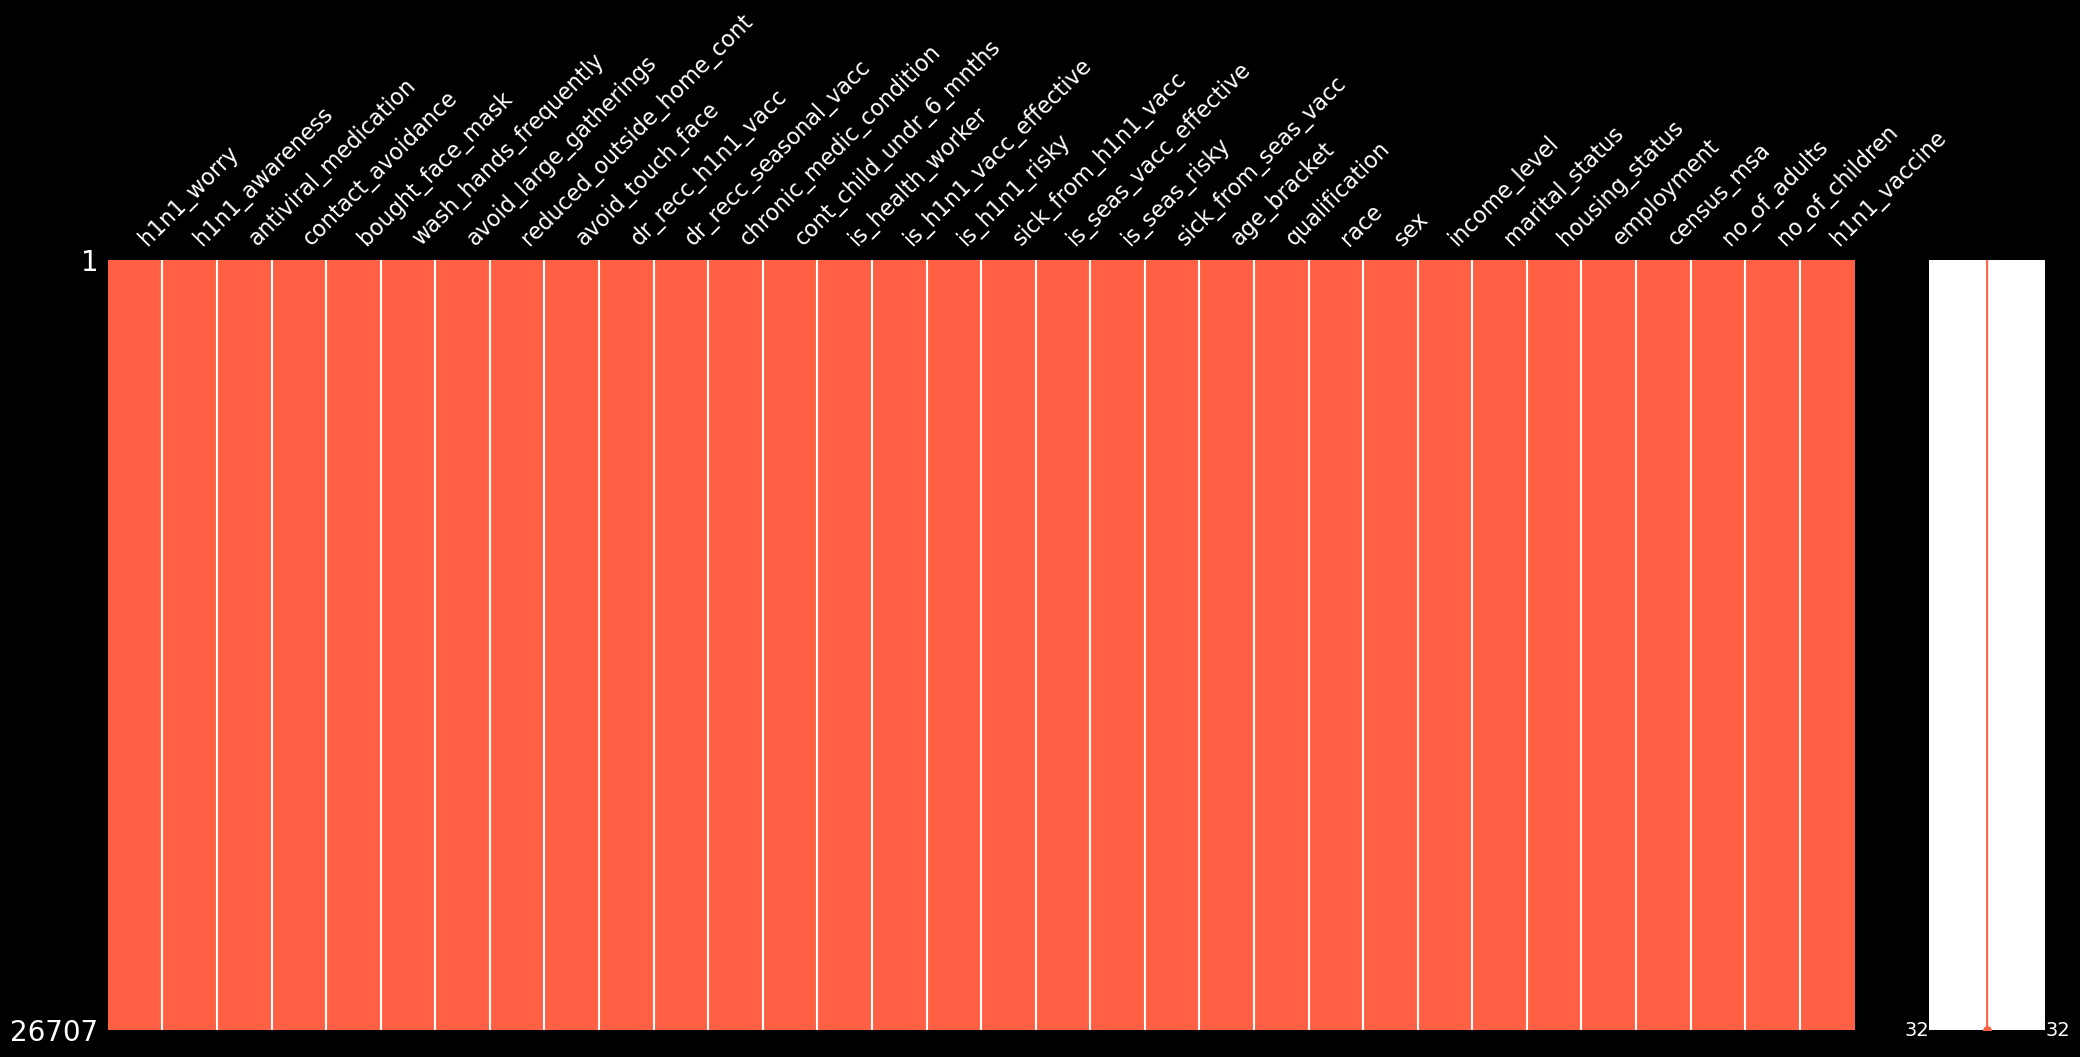

In [41]:
msno.matrix(df,color = (1,0.38,0.27))

In [42]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: i

### 4.) Feature Selction

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [44]:
x = df.drop(['h1n1_vaccine'],axis = 1)
y = df[['h1n1_vaccine']]

In [45]:
best_features = SelectKBest(score_func=chi2, k =3)
fit = best_features.fit(x,y)

In [46]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

In [47]:
features_scores = pd.concat([df_columns,df_scores],axis = 1)
features_scores.columns = ['Features','Score']
features_scores.sort_values(by = 'Score')

,Features,Score
28,census_msa,0.003839
30,no_of_children,0.284434
29,no_of_adults,0.907646
19,sick_from_seas_vacc,1.556451
6,avoid_large_gatherings,5.614840
23,sex,6.776568
7,reduced_outside_home_cont,8.641545
24,income_level,12.886711
22,race,14.931364
3,contact_avoidance,15.950408


In [48]:
X = df[['dr_recc_h1n1_vacc','is_h1n1_risky','is_seas_risky','dr_recc_seasonal_vacc','is_health_worker','is_h1n1_vacc_effective','h1n1_worry','chronic_medic_condition','bought_face_mask','sick_from_h1n1_vacc','h1n1_awareness']]
Y = df[['h1n1_vaccine']]

### 5.) Applying LR, DT, RF and SVM Models

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 100)

In [50]:
logreg = LogisticRegression(solver = 'liblinear').fit(X_train,Y_train)

In [51]:
Y_pred = logreg.predict(X_test)
logreg.score(X_train,Y_train)

0.8305042436345482

In [52]:
logreg.score(X_test,Y_test)

0.8353458766264158

In [53]:
DT = DecisionTreeClassifier(criterion = 'gini',max_depth = 3,random_state = 0)
DT.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [54]:
DT.score(X_train,Y_train)

0.8224538192710934

In [55]:
DT.score(X_test,Y_test)

0.8275765234484695

In [56]:
from sklearn import metrics

<Axes: >

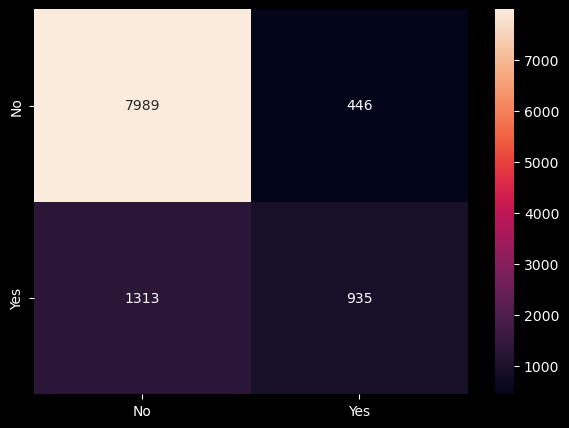

In [57]:
cm = metrics.confusion_matrix(Y_test,Y_pred,labels=[0,1])
df_cm = pd.DataFrame(cm , index = [i for i in ["No","Yes"]],
                columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot = True,fmt='g')

In [58]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators = 150,random_state = 0)
bgcl = bgcl.fit(X_train,Y_train)
Y_pred = bgcl.predict(X_test)
print(bgcl.score(X_test,Y_test))

0.8098848638023027


<Axes: >

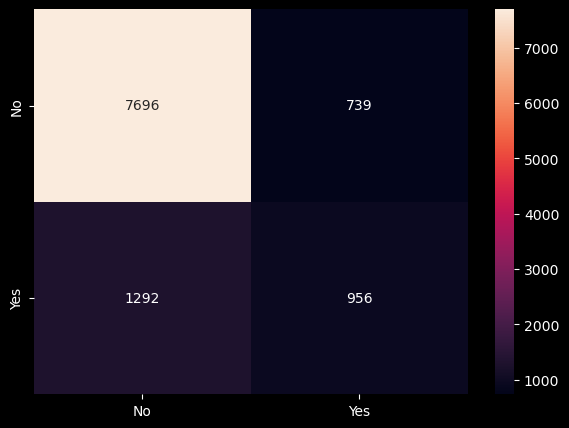

In [59]:
cm = metrics.confusion_matrix(Y_test,Y_pred,labels=[0,1])
df_cm = pd.DataFrame(cm , index = [i for i in ["No","Yes"]],
                columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot = True,fmt='g')

In [60]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 120, random_state = 0)
abcl = abcl.fit(X_train,Y_train)
Y_pred = abcl.predict(X_test)
print(abcl.score(X_test,Y_test))

0.8352522699616213


In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 200,random_state = 0)
gbcl = gbcl.fit(X_train,Y_train)
Y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test,Y_test))

0.8378732565758682


<Axes: >

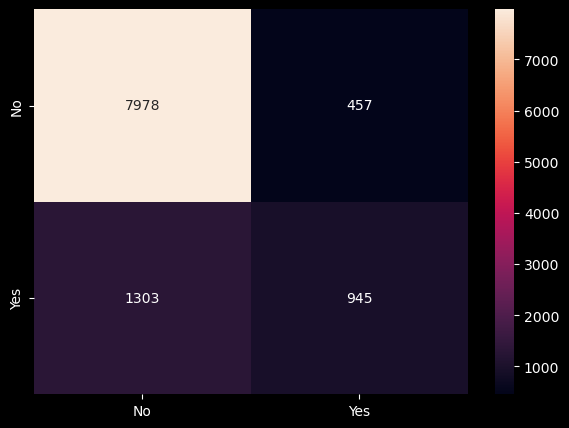

In [62]:
cm = metrics.confusion_matrix(Y_test,Y_pred,labels=[0,1])
df_cm = pd.DataFrame(cm , index = [i for i in ["No","Yes"]],
                columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot = True,fmt='g')

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 160,random_state = 0,max_features = 3)
rfcl = rfcl.fit(X_train,Y_train)
Y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test,Y_test))

0.8162501170083309


<Axes: >

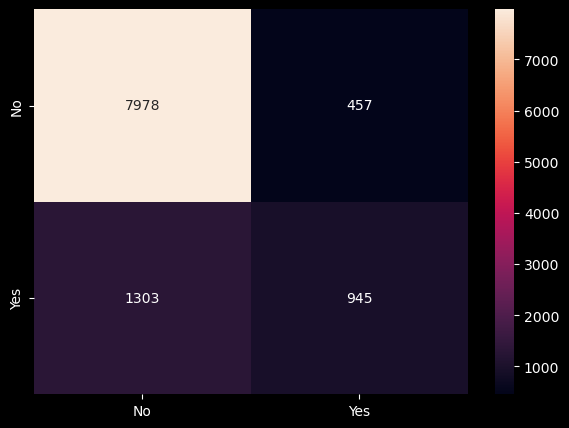

In [64]:
cm = metrics.confusion_matrix(Y_test,Y_pred,labels=[0,1])
df_cm = pd.DataFrame(cm , index = [i for i in ["No","Yes"]],
                columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot = True,fmt='g')

In [65]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)

SVC()

In [66]:
svc.score(X_train,Y_train)

0.8284448327508737

In [67]:
svc.score(X_test,Y_test)

0.8332865300009361